In [4]:
#load R packages
x = c("dplyr","plyr", "tidyr", "ggplot2")
lapply(x, require, character.only = TRUE)

Loading required package: tidyr


[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

In [6]:
# create color ingredient
c25 <- c("dodgerblue2","#E31A1C", # red
         "green4",
         "#6A3D9A", # purple
         "#FF7F00", # orange
         "black","gold1",
         "skyblue2","#FB9A99", # lt pink
         "palegreen2",
         "#CAB2D6", # lt purple
         "black", # lt orange
         "gray70", "khaki2",
         "maroon","orchid1","deeppink1","blue1","steelblue4",
         "darkturquoise","green1","yellow4","yellow3",
         "darkorange4","brown")

In [7]:
# prepare dataset for plotting
bbc <- read.csv("Alphaproteobacteria_Abundance.csv")
bbc <- gather(bbc, Bacteria, Abundance, NA.Alphaproteobacteria: Others)
bbc <- filter(bbc, Group == "G2" | Group == "SG2" | Group == "SG3" | Group == "G3")
bbc$Group = recode(bbc$Group, 'G2'='U1', 'G3'='U2', 'SG2'='S1', 'SG3'='S2')
cols <- colorRampPalette(c25)
myPal <- cols(length(unique(bbc$Bacteria)))

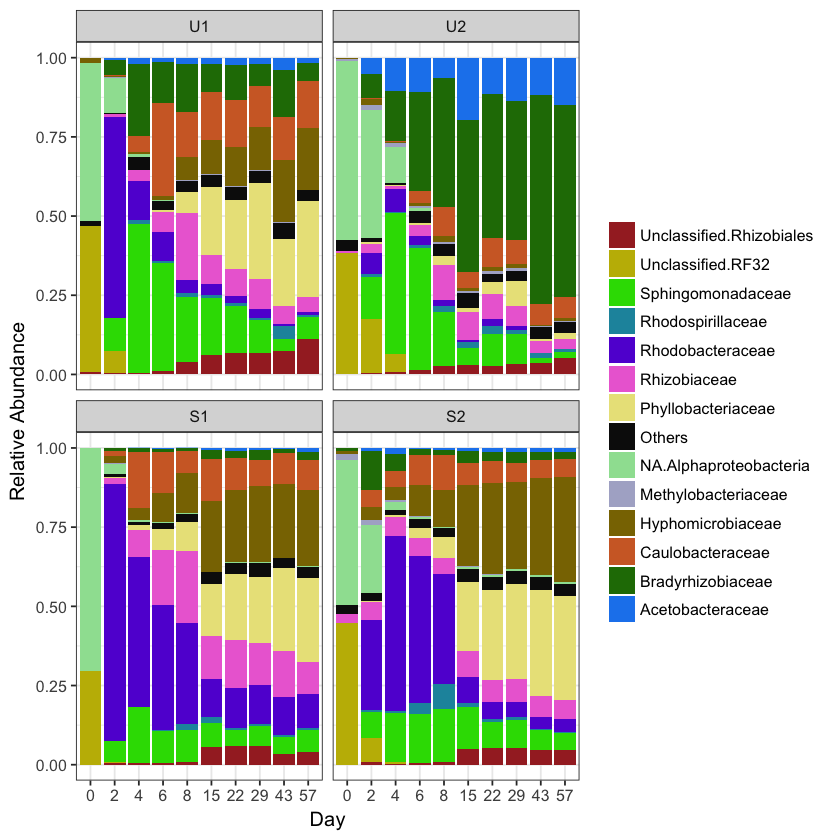

In [10]:
#plot the dataset
ggplot(bbc, aes(factor(Day), fill=Bacteria, weight=Abundance)) + 
  geom_bar() + 
  scale_fill_manual(name = "", guide = guide_legend(reverse=TRUE), values = myPal) +
  facet_wrap(~ Group, ncol=2) +
  xlab("Day") + ylab("Relative Abundance") +
  theme(axis.text=element_text(size=14, color ="black"),
        axis.title.y=element_text(size=14,face="bold", vjust=1), 
        axis.title.x=element_text(size=14,face="bold", vjust=-0.1)) +
  theme_bw(base_size = 12)